In [14]:
import sys
sys.path.append('/eos/home-i00/l/lkoller/SWAN_projects/data analysis 2024/commands')

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import os
from readTrc_4CH import Trc
from PIL import Image
pd.set_option("display.max_columns",None)
#pd.set_option("display.max_rows",None)

In [92]:
df = pd.read_csv('/eos/user/l/lkoller/GBAR/data24/datafile24.txt', delimiter = '\t')
df = df[df.Date >= '24_07_23']
fl = [val for val in list(df.MCP5) if 'dark' in val]
df = df[[True if val in fl else False for val in df.MCP5]]

In [105]:
fl

['/eos/experiment/gbar/pgunpc/data/24_07_23/PCO-SwY_exp_1_us_1721724998.838.dark.tif',
 '/eos/experiment/gbar/pgunpc/data/24_07_25/PCO-SwY_exp_10_us_1721936860.877.dark.tif']

In [84]:
shape_mat = np.zeros((1040, 1392))
center = [731,533]
rad = 440

for i in range(len(shape_mat[0])):
    for k in range(len(shape_mat)):
        curr_dis = ((i-center[0])**2 + (k-center[1])**2)**0.5
        if curr_dis < rad:
            shape_mat[k, i] = 1
            
arr_len = np.count_nonzero(shape_mat)

In [102]:
avs = np.zeros(len(fl))
std = np.zeros(len(fl))
ped_mat = np.zeros((1040,1392))
for i in range(len(fl)):
    temp_mat = np.array(Image.open(fl[i]))
    avs[i] = np.average(temp_mat[shape_mat == 1])
    std[i] = np.std(temp_mat[shape_mat == 1])
    ped_mat += temp_mat/len(fl)

ped_mat[shape_mat == 0] = 0

In [103]:
np.average(ped_mat[shape_mat == 1]), np.std(ped_mat[shape_mat == 1])

(806.7828050057796, 15.907353184984732)

In [96]:
avs, std

(array([805.41874487, 808.14686514]), array([22.04800998, 22.82977302]))

In [91]:
df

,Date,Time,Datetime,run_type,run,run_mode,event_number,DAQ,pbar_trap,positron,MCP1,MCP2,MCP3,MCP3.5,MCP4,MCP5,MCP7,Waveform_12bit,CMOS_Tracker,DRS4,Positron_Waveform,SD,LyA,SD_LyA,Cy_Des,NE00_I,NE50_I,NE00_Bm1,NE00_Bm2,NE00_Bm3,NE50_Bm1,NE50_Bm2,Int,Valve_in,MCP_in,MW_power,H-sou_pressure,cube_pressure,RC_pressure,MW_pressure,SwY_pressure,LyA_pressure,Main_delay,PCOs_delay,LyA_delay,Laser_delay,FC_current,MCP4_current,MCP5_current,St_dec_up,St_dec_dw,St_dec_ri,St_dec_le,St_Cub_up,St_Cub_dw,St_Cub_ri,St_Cub_le,St_RC1_up,St_RC1_dw,St_RC1_ri,St_RC1_le,St_RC2_up,St_RC2_dw,St_RC2_ri,St_RC2_le,St_RC3_up,St_RC3_dw,St_RC3_ri,St_RC3_le,St_Al1_up,St_Al1_dw,St_Al1_ri,St_Al1_le,St_Al2_up,St_Al2_dw,St_Al2_ri,St_Al2_le,QT_RC1_+,QT_RC1_-,QT_RC2_+,QT_RC2_-,QT_RC3_+,QT_RC3_-,SwY_1_+,SwY_1_-,SwY_3_+,SwY_3_-,EL_pT_in,EL_pT_1,EL_pT_2,EL_pT_3,EL_pT_4,EL_RC_in,EL_SwY_+,EL_Al1_+,EL_Al2_+,EL_Al3_+,Ly_MCP_1,Ly_MCP_2,Ly_MCP_3,Ly_MCP_4,Qnch_+,Qnch_-,TgDefl_+,H-Defl_+,H-Cor1_-,H-Cor1-,1_phos_+,1_mcp_+,2_phos_+,2_mcp_+,3_phos_+,3_mcp_+,3.5_grid_-,3.5_phos_+,3.5_mcp_+,4_phos_+,4_mcp_+,5_phos_+,5_mcp_+,6_phos_+,6_mcp_+,7_phos_+,7_mcp_+,Sci_1_-,Sci_2_-,H_offs,target_pos,front_bias,mw_amp_curr,hfs_temp,hfs_freq,hfs_pow,sc_temp,sc_freq,sc_pow,empty_1,empty_2,empty_3,empty_4,empty_5,empty_6,empty_7,empty_8
12914,24_07_22,1.721375e+09,2024-07-19 09:35:39.828000,0,663.0,-1.0,0,0.0,0,0,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_07_22/PCO-...,None,None,None,None,None,None,None,None,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,914590020.0,0.0,-1.734839e-07,1.710000e-08,1.410000e-08,7.895000e-09,3.310000e-09,3.170000e-09,1.010000e-09,0.000902,0.001002,0.00101,0.000999,1.477703e-07,1.310206e-07,1.486608e-07,0.143884,0.017456,0.060801,0.044405,0.045346,0.026467,0.052223,0.057699,0.064673,0.099083,0.040923,0.075489,-0.010165,-0.018188,-0.028375,-0.062675,-0.019740,-0.004469,0.017263,0.025508,0.021873,0.032236,0.026256,0.026708,0.030620,0.015463,0.015394,0.016463,0.011522,0.027739,-0.000108,0.047811,0.030967,0.108491,-0.015233,0.013979,0.081289,0.001994,0.116021,0.449453,0.422167,0.446148,0.545064,0.061871,-0.075553,-0.238931,-0.160924,-0.430324,-0.777184,-0.719831,-0.73301,-0.767342,-0.004203,-0.147833,-0.034969,-0.044975,-0.763885,-0.763802,0.10218,-0.024289,-0.013267,-0.002793,-0.017636,-0.015310,0.066699,0.002076,-0.037652,-0.127857,-0.014161,-0.039034,-0.149694,-0.148556,-0.161124,0.001308,-0.038042,-0.752161,-0.741825,0.000103,93.0,0.0,0.0,50.3,1.162000e+09,-100.0,50.3,9.100000e+08,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13241,24_07_23,1.721725e+09,2024-07-23 10:56:38.838000,0,0.0,NaN,0,0.0,0,0,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_07_23/PCO-...,None,None,None,None,None,None,None,None,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,872451015.0,16.0,-4.107396e-07,5.130000e-10,1.120000e-08,2.599000e-09,2.810000e-09,1.010000e-09,3.340000e-09,0.000902,0.001000,0.00101,0.000999,4.437702e-07,2.490849e-07,8.689764e-05,49.963230,-49.980250,9.964213,-9.965590,0.043355,0.025470,0.054715,0.057201,0.070907,0.095093,0.043415,0.078231,-0.009428,-0.016714,-0.023952,-0.066360,0.008267,0.005855,0.016525,-0.000291,0.022619,0.033232,0.027002,0.028700,0.034854,0.016956,0.017137,0.020444,0.021105,0.029951,-0.009691,0.038221,0.046451,0.112917,-0.009333,0.018404,0.083503,0.014528,-1550.008000,-3300.000000,-2200.000000,-1499.997000,0.399186,0.061871,-0.075553,-0.234004,-0.160924,-0.415559,-0.777184,-0.719831,-0.73301,-0.767342,-0.004203,-0.147833,-0.029807,-0.049923,-0.763885,-0.763802,0.10218,-0.024289,-0.016235,-0.001310,-0.016155,-0.015310,0.061755,-0.000888,-0.037652,-0.124891,-0.014161,4000.003000,2250.005000,-0.141625,-0.162113,0.006247,-0.052865,-940.005100,-940.004900,0.000103,93.0,0.0,0.0,50.0,1.162000e+09,-100.0,49.7,9.100000e+08,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13503,24_07_25,1.721937e+09,2024-07-25 21:47:40.877000,0,0.0,NaN,0,0.0,0,0,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_07_25/PCO-...,None,None,None,None,None,None,None,None,Non

In [79]:
avs

array([824.66657568, 825.47432738, 827.3131539 , 826.50702016,
       828.08148286, 825.84458801, 825.08615748, 828.33302147,
       826.15230106, 829.38676076, 828.36193411, 805.54495155,
       805.62490854, 805.72455716, 805.90177531, 805.30142376,
       805.45126172, 805.06968859, 805.67183567, 805.65462357,
       805.63046613, 805.68097774, 805.46127197, 805.62440868,
       805.19996646, 805.22950391, 805.39183165, 805.34644355,
       805.37456037, 805.48333791, 805.70807512, 805.74883299,
       805.62905207, 805.24456532, 805.70239256, 805.79810812,
       805.31292042, 805.32004992, 804.94531691, 805.36929216,
       805.18892362, 805.58867567, 805.31009229, 805.86352986,
       805.482108  , 805.47916149, 805.68188537, 805.4697958 ,
       805.69826876, 805.49596581, 805.81143976, 805.38377479,
       805.63589876, 805.56181506, 805.4346021 , 805.39054913,
       805.39863888, 805.21389004, 805.46707949, 805.49380197,
       805.80530339, 805.19308688, 805.20166991, 805.24

Average of file: 808.1468651395893
Std of file: 22.829773015997148
Maximum pixel value in file: 932


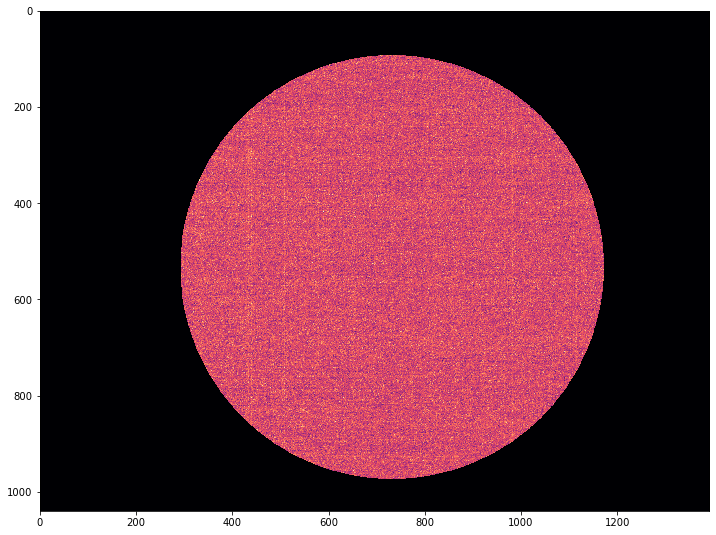

In [104]:
pos = 1
arr = np.array(Image.open(fl[pos]))

plt.figure(figsize = (12,12))

plt.imshow(ped_mat, interpolation = 'nearest', vmin = 700, vmax = 880, cmap = 'magma')

print('Average of file:', avs[pos])
print('Std of file:', std[pos])
print('Maximum pixel value in file:', np.max(arr))

In [28]:
arr1d = np.ravel(arr)
arr1d = arr1d[arr1d>0]

In [52]:
arr1dl = arr1d.copy()
len(arr1dl[arr1dl<700])

20